# Physics 444 Problem Set #6

In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate
from scipy.integrate import quad

from astropy import units as u
from astropy import constants as c

import matplotlib.pyplot as plt

from progressbar import ProgressBar

In [2]:
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

# Q1(a-c)

In [19]:
def cosmo(wr0): 
    
    H0 = 67.8 *u.km/u.s/u.Mpc
    # wr0 = 9.03*10**(-5)
    wm0 = 0.306
    wl0 = 0.692
    w0 = 1
    
    # Q1(a)
    def t0(H0,wm0):
        result = 2. * H0**(-1.) * np.log((np.sqrt(1.-wm0)+1.) / np.sqrt(wm0)) / (3.*np.sqrt(1.-wm0))
        return result.to(u.Gyr)

    print ('t0 =',t0(H0,wm0))

    # Q1(b)
    def t(a):
        result = 1/ (H0*(np.sqrt(wr0*a**(-2.) + wm0*a**(-1.) + wl0*a**2. + (1-w0))))
        return result.to(u.yr).value

    def t_int(a):
        result = quad(t,0,a)[0]
        return result
    p = ProgressBar()
    a_list = np.logspace(-5,10,100)
    t_list = np.array([t_int(a) for a in p(a_list)])

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)',fontsize = 20)
    ax.set_ylabel('a',fontsize = 20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,a_list)
    plt.show()

    z_list = (1/a_list) - 1

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)')
    ax.set_ylabel('z')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,z_list)
    plt.show()

    # Q1(c)

    print('age of the universe = ', t_int(1), 'years')
    return a_list,t_list

t0 = 13.827066203492155 Gyr


100% |########################################################################|


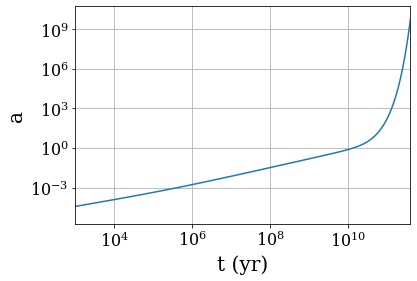

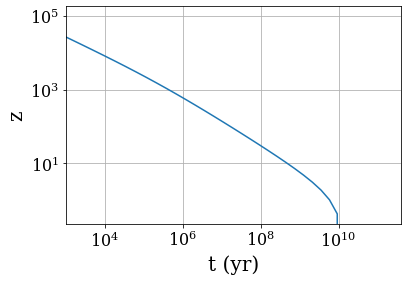

age of the universe =  13827244193.955175 years


In [20]:
a_list,t_list = cosmo(9.03*10**(-5))

# Q1(d)

t0 = 13.827066203492155 Gyr


100% |########################################################################|


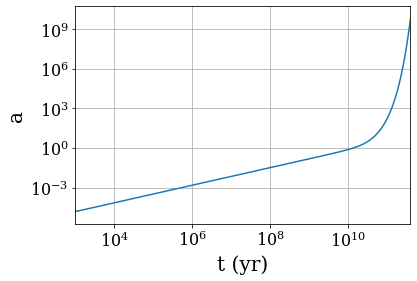

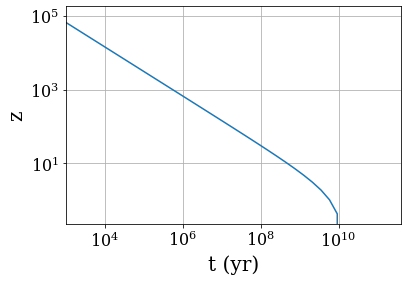

age of the universe =  13833142418.74652 years


In [23]:
_,_ = cosmo(0)

In [24]:
print('difference in age of the universe = ', 13827244193.955175 - 13833142418.74652, 'years')

difference in age of the universe =  -5898224.791343689 years


# Q1(e)

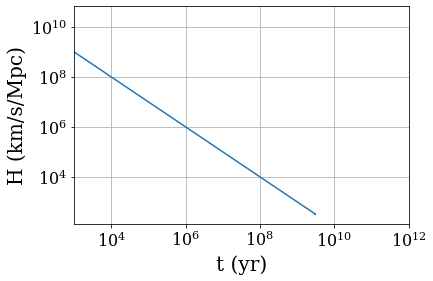

In [30]:
# H(t)=adot/a

da = a_list[1:]-a_list[:-1]
dt = t_list[1:]-t_list[:-1]
mida = (a_list[1:]-a_list[:-1])/2
midt = (t_list[1:]-t_list[:-1])/2
H = ((da)/(mida * dt) / u.yr).to(u.km/u.s/u.Mpc)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('t (yr)')
ax.set_ylabel('H (km/s/Mpc)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e3,1e12)
ax.plot(midt,H)
plt.show()